In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds

tfkl = tfk.layers
from tensorflow.data.experimental import sample_from_datasets

**Preprocessing**

As typical, we'll start with the MNIST data. Recall from last time, we have to do some transformations and preprocessing on these images.

In [2]:
data, info = tfds.load('mnist', with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
preprocess = lambda d: (tf.cast(d["image"], tf.float32)/255, tf.one_hot(d["label"], depth=10))

ds_train = data["train"].map(preprocess).cache().batch(32)
ds_test = data["test"].map(preprocess).cache().batch(32)

In [4]:
img_shape = info.features['image'].shape

In [5]:
img_shape

(28, 28, 1)

**CNNs in TF Keras**

We'll use the Sequential class rely on new layer types that correspond to concepts we covered in lecture: Conv2D, AvgPool2D, MaxPool2D. 

Details such as kernel size, padding, strides and so on must be specified as args to these classes, where appropriate.

In [6]:
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 1, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=(4,4)))
model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                370       
Total params: 380
Trainable params: 380
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test)

Epoch 1/20
20/20 [==============================] - 3s 142ms/step - loss: 2.3008 - val_loss: 2.2983
Epoch 2/20
20/20 [==============================] - 2s 78ms/step - loss: 2.2965 - val_loss: 2.2953
Epoch 3/20
20/20 [==============================] - 1s 73ms/step - loss: 2.2947 - val_loss: 2.2914
Epoch 4/20
20/20 [==============================] - 1s 74ms/step - loss: 2.2887 - val_loss: 2.2867
Epoch 5/20
20/20 [==============================] - 1s 73ms/step - loss: 2.2889 - val_loss: 2.2816
Epoch 6/20
20/20 [==============================] - 1s 74ms/step - loss: 2.2812 - val_loss: 2.2752
Epoch 7/20
20/20 [==============================] - 1s 74ms/step - loss: 2.2697 - val_loss: 2.2667
Epoch 8/20
20/20 [==============================] - 1s 72ms/step - loss: 2.2726 - val_loss: 2.2578
Epoch 9/20
20/20 [==============================] - 1s 72ms/step - loss: 2.2522 - val_loss: 2.2457
Epoch 10/20
20/20 [==============================] - 1s 70ms/step - loss: 2.2388 - val_loss: 2.2303
Epoch 11

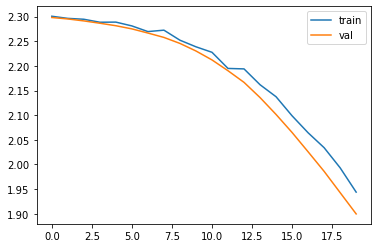

In [9]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Probability')

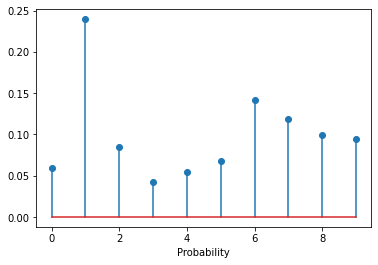

In [10]:
plt.stem(model.predict(ds_test.take(1))[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")

Which architectural hyperparameters might we change in the above?



**Exercise - Deep CNN**

Build and fit your own CNN model with 3 convolutional **modules**, where each one contains:
  * kernel convolution 
    * you pick number of kernels
    * you pick kernel shape/size
    * you pick activation
  * pooling
  * dropout

We'll use the Fashion MNIST dataset, a low-res collection of images of clothing.

In [11]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
images = images[:, :, :, np.newaxis]
labels = tf.one_hot(labels.astype(np.int32),depth=10)

# optional - TF Datasets objects
# fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
# fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)


4423680/4422102 [==============================] - 0s 0us/step


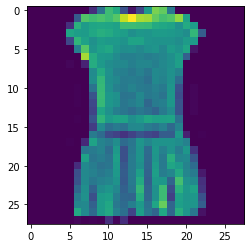

In [12]:
plt.imshow(images[3, :, :, :].squeeze())

In [13]:
# your code here
model0 = tfk.Sequential()
model0.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=2, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model0.add(tfkl.MaxPool2D(pool_size=2))
model0.add(tfkl.Dropout(0.2))

#
model0.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model0.add(tfkl.MaxPool2D(pool_size=2))
model0.add(tfkl.Dropout(0.2))

#
model0.add(tfkl.Conv2D(filters = 8, kernel_size=2, strides=1, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model0.add(tfkl.MaxPool2D(pool_size=2))
model0.add(tfkl.Dropout(0.2))

#flatten
model0.add(tfkl.GlobalMaxPool2D())
model0.add(tfkl.Dense(10,activation='softmax'))

In [14]:
model0.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model0.fit(images,labels,steps_per_epoch=20, epochs=20, batch_size=32)

Epoch 1/20
20/20 [==============================] - 0s 7ms/step - loss: 2.2990
Epoch 2/20
20/20 [==============================] - 0s 6ms/step - loss: 2.2855
Epoch 3/20
20/20 [==============================] - 0s 7ms/step - loss: 2.2724
Epoch 4/20
20/20 [==============================] - 0s 7ms/step - loss: 2.2567
Epoch 5/20
20/20 [==============================] - 0s 7ms/step - loss: 2.2254
Epoch 6/20
20/20 [==============================] - 0s 7ms/step - loss: 2.1949
Epoch 7/20
20/20 [==============================] - 0s 7ms/step - loss: 2.1478
Epoch 8/20
20/20 [==============================] - 0s 7ms/step - loss: 2.1224
Epoch 9/20
20/20 [==============================] - 0s 7ms/step - loss: 2.0829
Epoch 10/20
20/20 [==============================] - 0s 7ms/step - loss: 2.0307
Epoch 11/20
20/20 [==============================] - 0s 7ms/step - loss: 1.9581
Epoch 12/20
20/20 [==============================] - 0s 7ms/step - loss: 1.9965
Epoch 13/20
20/20 [==============================

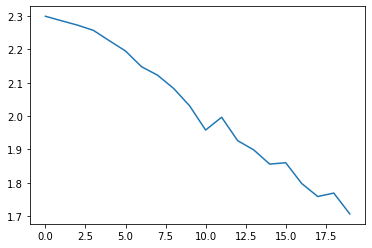

In [15]:
plt.plot(results.history["loss"])


#|**Exercise - Transfer Learning**



In [16]:
data, info = tfds.load('rock_paper_scissors', with_info=True)
train_data = data["train"].map(lambda x: (tf.cast(x["image"], tf.float32) / 255., tf.one_hot(x["label"], depth=3) )).batch(32)

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete8CQC81/rock_paper_scissors-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete8CQC81/rock_paper_scissors-test.tfrecord


Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [17]:
info.features['image'].shape

(300, 300, 3)

,image,label
0,,2 (scissors)
1,,2 (scissors)
2,,0 (rock)
3,,1 (paper)
4,,0 (rock)
5,,1 (paper)
6,,2 (scissors)
7,,1 (paper)
8,,2 (scissors)
9,,2 (scissors)

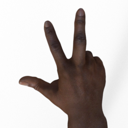
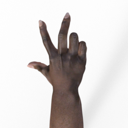
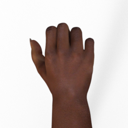
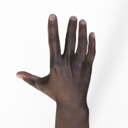
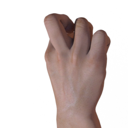
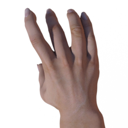
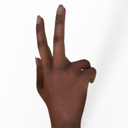
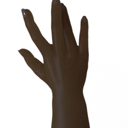
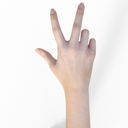
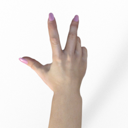

In [ ]:
tfds.as_dataframe(data["train"].take(10), info)

# Exercise

1. Build a deep CNN model and train it for this binary classification task. Fit the model using the small dataset of 500 samples, *train_data*.

What accuracy can your model acheive on the training data?

In [18]:
# Your code here
model1 = tfk.Sequential()
model1.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=2, 
                      padding="valid", activation='relu', input_shape=(300, 300, 3)))
model1.add(tfkl.MaxPool2D(pool_size=2))
model1.add(tfkl.Dropout(0.2))
#
model1.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model1.add(tfkl.MaxPool2D(pool_size=2))
model1.add(tfkl.Dropout(0.2))

#
model1.add(tfkl.Conv2D(filters = 8, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model1.add(tfkl.MaxPool2D(pool_size=2))
model1.add(tfkl.Dropout(0.2))


#flatten
model1.add(tfkl.GlobalMaxPool2D())
model1.add(tfkl.Dense(3,activation='softmax'))

In [19]:
model1.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 74, 74, 16)        2064      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 36, 36, 8)        

In [40]:
train_data0 = train_data.take(500).repeat()
results = model1.fit(train_data0,steps_per_epoch=10, epochs=20)

Epoch 1/20
10/10 [==============================] - 5s 546ms/step - loss: 1.0983 - accuracy: 0.3625
Epoch 2/20
10/10 [==============================] - 5s 541ms/step - loss: 1.0935 - accuracy: 0.3688
Epoch 3/20
10/10 [==============================] - 5s 538ms/step - loss: 1.1075 - accuracy: 0.3094
Epoch 4/20
10/10 [==============================] - 5s 546ms/step - loss: 1.1058 - accuracy: 0.3063
Epoch 5/20
10/10 [==============================] - 5s 538ms/step - loss: 1.1008 - accuracy: 0.3375
Epoch 6/20
10/10 [==============================] - 5s 544ms/step - loss: 1.0994 - accuracy: 0.3406
Epoch 7/20
10/10 [==============================] - 5s 534ms/step - loss: 1.1025 - accuracy: 0.3375
Epoch 8/20
10/10 [==============================] - 5s 512ms/step - loss: 1.0989 - accuracy: 0.3494
Epoch 9/20
10/10 [==============================] - 5s 538ms/step - loss: 1.0974 - accuracy: 0.3562
Epoch 10/20
10/10 [==============================] - 5s 535ms/step - loss: 1.0985 - accuracy: 0.3781

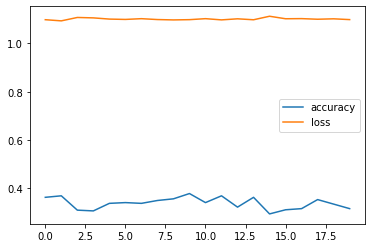

In [41]:
plt.plot(results.history["accuracy"])
plt.plot(results.history["loss"])
plt.legend(labels=["accuracy", "loss"])

In [ ]:
# The highest accuracy here is 0.378.

 2. Now use transfer learning by incorporating the pretrained VGG16 model.

In [22]:
from tensorflow.keras.applications import VGG16

In [23]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(300,300,3))

58892288/58889256 [==============================] - 1s 0us/step


Build a Sequential model, using our VGG16 base. Make sure the freeze the weights of the convolutional backbone, but leave the remainder of the network weights as learnable. Fit this model and compare the overall accuracy as well as the loss curves (efficiency).


In [24]:
# Your code here
top_model = tfk.Sequential()
top_model.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=2, 
                      padding="valid", activation='relu', input_shape=conv_base.output_shape[1:]))
top_model.add(tfkl.MaxPool2D(pool_size=2))
top_model.add(tfkl.Dropout(0.2))

top_model.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
top_model.add(tfkl.MaxPool2D(pool_size=1))
top_model.add(tfkl.Dropout(0.2))

#
top_model.add(tfkl.Conv2D(filters = 8, kernel_size=1, strides=1, 
                      padding="valid", activation='relu'))
top_model.add(tfkl.MaxPool2D(pool_size=1))
top_model.add(tfkl.Dropout(0.2))



top_model.add(tfkl.GlobalMaxPool2D())
top_model.add(tfkl.Dense(3,activation='softmax'))
top_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 4, 4, 32)          65568     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 16)          2064      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 1, 16)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 8)          

In [25]:
new_model = tfk.Sequential()
for l in conv_base.layers:
    new_model.add(l)
new_model.add(top_model)

In [26]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 75, 75, 256)      

In [36]:
for layer in new_model.layers[:18]:
   layer.trainable = False
for layer in new_model.layers[18:]:
   layer.trainable = True
new_model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [38]:
train_data0 = train_data.take(500).repeat()
results = new_model.fit(train_data0,steps_per_epoch=2, epochs=20)

Epoch 1/20
2/2 [==============================] - 28s 14s/step - loss: 0.1882 - accuracy: 0.9062
Epoch 2/20
2/2 [==============================] - 28s 14s/step - loss: 0.2391 - accuracy: 0.8750
Epoch 3/20
2/2 [==============================] - 28s 14s/step - loss: 0.1551 - accuracy: 0.9219
Epoch 4/20
2/2 [==============================] - 28s 14s/step - loss: 0.1086 - accuracy: 0.9688
Epoch 5/20
2/2 [==============================] - 28s 14s/step - loss: 0.1294 - accuracy: 0.9531
Epoch 6/20
2/2 [==============================] - 28s 14s/step - loss: 0.2010 - accuracy: 0.8594
Epoch 7/20
2/2 [==============================] - 28s 14s/step - loss: 0.1624 - accuracy: 0.9219
Epoch 8/20
2/2 [==============================] - 28s 14s/step - loss: 0.1568 - accuracy: 0.9375
Epoch 9/20
2/2 [==============================] - 28s 14s/step - loss: 0.0648 - accuracy: 0.9844
Epoch 10/20
2/2 [==============================] - 28s 14s/step - loss: 0.2392 - accuracy: 0.8906
Epoch 11/20
2/2 [============

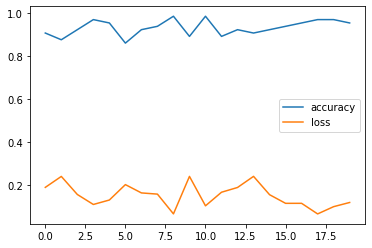

In [39]:
plt.plot(results.history["accuracy"])
plt.plot(results.history["loss"])
plt.legend(labels=["accuracy", "loss"])

In [ ]:
# The accuracy of this model is much higher , and the loss is much lower.